2023-1 ML 교육세션 실습 자료를 참고했습니다.

In [1]:
# 데이터셋 불러오기
# spaceship_tt.csv 데이터프레임을 이용해, "Transported"값을 분류 대상으로 삼는 decision tree classifier 만들기
import numpy as np
import pandas as pd
df = pd.read_csv('spaceship_tt.csv')

In [2]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

PassengerId : 승객 ID

HomePlanet : 출발 행성(거주지)

CryoSleep : 취침 방식 여부

Cabin : 객실 종류 및 번호 (port : 좌현, starboard : 우현)

Destination : 목적지

Age : 승객의 나이

VIP : 승객의 VIP 서비스 유무

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck : 승객이 해당 서비스에 대해 지불한 금액

Name : 이름

Transported : 도착 여부

In [3]:
# 모델 라이브러리 import
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
# base dataframe
df_base=df[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']]

In [5]:
df_base.dropna(inplace=True)

<ipython-input-5-3c1dfc79aac0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base.dropna(inplace=True)


In [6]:
df_base

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [7]:
# Model build
dt_clf = DecisionTreeClassifier(random_state=111)

# Train/test split 진행 (7:3)
X_train, X_test, y_train, y_test = train_test_split(df_base.drop('Transported',axis=1),
                                                    df_base['Transported'], # target variable = Transported
                                                    test_size=0.3, random_state=111)
# 모델 훈련
dt_clf = dt_clf.fit(X_train,y_train)

In [8]:
X_train

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
5664,False,10.0,False,0.0,0.0,0.0,0.0,0.0
6303,False,28.0,False,32.0,0.0,304.0,291.0,2.0
963,False,0.0,False,0.0,0.0,0.0,0.0,0.0
6375,False,21.0,False,1244.0,0.0,1119.0,0.0,3.0
8299,False,34.0,False,0.0,3126.0,0.0,112.0,15.0
...,...,...,...,...,...,...,...,...
5017,True,38.0,False,0.0,0.0,0.0,0.0,0.0
5787,False,33.0,True,0.0,3095.0,0.0,197.0,40.0
2429,True,34.0,False,0.0,0.0,0.0,0.0,0.0
8421,False,39.0,False,2101.0,41.0,0.0,525.0,19.0


In [9]:
# 평가지표 출력
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.7601102941176471


# 다양한 모델을 통한 평가

In [10]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
# n_estimators를 변경 가능
# 모델별로 추가 parameter 튜닝 가능
rf_reg = RandomForestRegressor(n_estimators=200)
gbm_reg = GradientBoostingRegressor(n_estimators=200)
xgb_reg = XGBRegressor(n_estimators=200)
lgbm_reg = LGBMRegressor(n_estimators=200)

In [11]:
model = rf_reg  # random forest


# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환하는 함수 정의
from sklearn.metrics import mean_squared_error # regressor를 위한 평가 지표
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)

    mse = mean_squared_error(y_test, pred)

    print('###', model.__class__.__name__, '###')
    print('Mean Squared Error:', mse)


In [12]:
get_model_predict(model,X_train, X_test, y_train, y_test, is_expm1=True)

### RandomForestRegressor ###
Mean Squared Error: 0.4675999147631928


In [13]:
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_two_models_predict(model1, model2, X_train, X_test, y_train, y_test, is_expm1=False):
    model1.fit(X_train, y_train)
    model1_pred = model1.predict(X_test)
    model2.fit(X_train, y_train)
    model2_pred = model2.predict(X_test)

    pred = 0.4*model1_pred + 0.6*model2_pred # 각 모델의 반영 가중치 설정

    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    mse = mean_squared_error(y_test, pred)

    print('### Two Models ###')
    print('Mean Squared Error:', mse)

In [14]:
model1 = rf_reg
model2 = gbm_reg  # GBM Model (Boosting)

get_two_models_predict(model1, model2, X_train, X_test, y_train, y_test, is_expm1=True)


### Two Models ###
Mean Squared Error: 0.45120909258731223


## 두 과제를 "ML_과제_(이름).ipynb" 의 파일명으로 제출해 주세요!


### 과제1
비지도 학습의 목적인 Grouping에 대해 자세히 설명해 주세요! Dataset을 Grouping한다는 것이 무슨 의미인지 간단히 서술해 주시고,

세션에서 언급되었던 Grouping을 위한 두 수단에 대해서 예시 모델을 제시하여 설명해 주시면 됩니다! 예시 모델의 종류에 대해서는 구글링을 통해 조사할 수 있겠습니다.

Grouping은 데이터의 특성을 반영하여 데이터를 여러 집단으로 분류하는 것을 의미한다. 그 과정에서 사람이 직접 구분할 특성을 지정해 주는 것이 아니라, 기계 스스로 데이터의 특성을 학습하여 구분자를 도출하고 분류 작업을 수행한다. grouping은 clustering과 dimensionality reduction 두가지 수단을 활용한다.

1) Clustering (군집화)

  군집화를 위한 모델은 다음이 대표적이다.
  - K-means Clustering
  - KNN (K-Nearest Neighbors)

  이 중 KNN에 대해서 좀 더 자세히 설명하면, KNN은 데이터를 총 K개의 집단으로 분류하는 알고리즘이다. 다음과 같은 방식으로 분류 작업을 수행하게 된다.
    - 임의의 k값을 정한다.
    - k개의 중심 노드를 선택한다.
    - 중심 노드를 제외한 모든 데이터 노드와 중심 노드들 간의 거리를 계산하고, 데이터 노드를 가장 가까운 중심 노드와 같은 집단으로 할당한다.
    - 중심 노드를 다시 업데이트한다.
    - 더이상 업데이트가 이뤄지지 않을 때까지 반복한다.

2) Dimensionality Reduction (차원축소)

 차원 축소를 위한 모델은 다음이 대표적이다.
 - PCA
 - LDA

 이 중 PCA에 대해 자세히 설명하면, PCA는 데이터를 특정 기준이 되는 축에 reflect시켜 차원을 줄이는 기법을 말한다. 여기서 기준 축을 정하는 기준은 분산인데, 가장 높은 분산을 가지는 축을 기준으로 정한다. 높은 분산을 갖는 축을 기준으로 하는 이유는 정보 손실을 최소화하기 위함이다.

### 과제2
드라이브에 첨부된 diabetes.csv 파일을 이용해, decision tree를 이용한 classifier model을 디자인해 주세요!

분류 문제에 맞는 (간단한 수준의) 데이터 전처리 및 Feature selection이 선행되어야 합니다.

모델의 성능은 상관 없지만, 모델 구동 결과 및 평가지표의 출력은 정상적으로 이루어져야 합니다! 평가지표의 종류 또한 상관 없습니다.

데이터셋에 대한 설명은 아래 캐클 링크를 참조해 주세요!
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

과제 진행에 있어 어려움을 겪으신다면 아래 링크의 내용을 참조하시면 됩니다!
https://www.datacamp.com/tutorial/decision-tree-classification-python


In [39]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
df.isna().sum() # 결측값 확인

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [41]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome',axis=1),
                                                    df['Outcome'], # target variable = Outcome
                                                    test_size=0.3, random_state=42)

In [42]:
y_train.value_counts() # train data label 불균형 확인

0    349
1    188
Name: Outcome, dtype: int64

In [43]:
# SMOTE oversampling방법 이용해 데이터 불균형 해소
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train,y_train = smote.fit_resample(X_train,y_train)

In [44]:
y_train.value_counts() #oversampling 결과

0    349
1    349
Name: Outcome, dtype: int64

In [45]:
# 모델 선언 및 훈련
from sklearn import tree
from sklearn.metrics import mean_squared_error
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

[Text(0.49776785714285715, 0.9642857142857143, 'x[1] <= 123.5\ngini = 0.5\nsamples = 698\nvalue = [349, 349]'),
 Text(0.21819196428571427, 0.8928571428571429, 'x[7] <= 28.5\ngini = 0.397\nsamples = 355\nvalue = [258, 97]'),
 Text(0.09151785714285714, 0.8214285714285714, 'x[5] <= 49.1\ngini = 0.141\nsamples = 183\nvalue = [169, 14]'),
 Text(0.08258928571428571, 0.75, 'x[5] <= 31.4\ngini = 0.124\nsamples = 181\nvalue = [169, 12]'),
 Text(0.03571428571428571, 0.6785714285714286, 'x[0] <= 5.5\ngini = 0.037\nsamples = 106\nvalue = [104, 2]'),
 Text(0.017857142857142856, 0.6071428571428571, 'x[6] <= 0.672\ngini = 0.019\nsamples = 102\nvalue = [101, 1]'),
 Text(0.008928571428571428, 0.5357142857142857, 'gini = 0.0\nsamples = 88\nvalue = [88, 0]'),
 Text(0.026785714285714284, 0.5357142857142857, 'x[6] <= 0.697\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.017857142857142856, 0.4642857142857143, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03571428571428571, 0.4642857142857143,

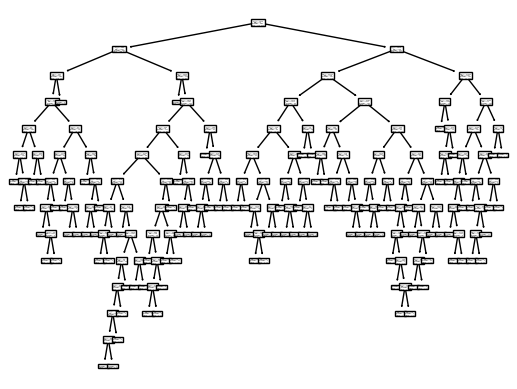

In [46]:
# 모델 구조 확인
tree.plot_tree(clf)

In [47]:
# 평가 지표 확인
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.6666666666666666
